# 001 实现线性回归模型




In [49]:
# Import package
import random
import matplotlib.pyplot as plt
import torch
%matplotlib inline


## 构造一个人造的数据集

### 定义线性模型参数

- Weight: $w=[2, -3.4]^T$
- Bias: $b=4.2$
- 噪声: $\epsilon$
- 标签: $y = Xw + b + \epsilon$

In [50]:
def create_data(w, b, size):
    # X: 均值为0, 方差为1, 大小为size*len(w)
    X = torch.normal(0, 1, (size, len(w)))
    y = torch.matmul(X, w) + b
    # 创造噪音epsilon
    epsilon = torch.normal(0, 0.01, y.shape)
    y += epsilon
    # reshape(x, y): 将张量变形，值为-1时表示自动.
    return X, y.reshape((-1, 1))


real_w, real_b = torch.tensor([2, -3.4]), 4.2
features, labels = create_data(w=real_w, b=real_b, size=1000)

features[0], labels[0]


(tensor([1.9767, 0.1101]), tensor([7.7881]))

### 将数据集打印出来

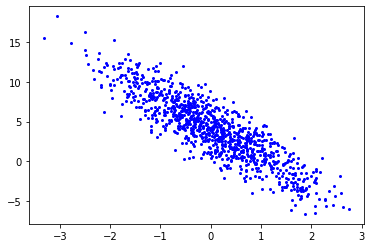

In [51]:
plt.plot(features[:, 1].detach().numpy(),
         labels.detach().numpy(), 'bo', markersize=2)
plt.show()


## 生成固定大小的 Batch

In [52]:
def data_iter(features, labels, batch_size):
    feat_size = len(features)
    # 生成一个大小为feat_size的下标列表并打乱
    indices = list(range(feat_size))
    random.shuffle(indices)

    for i in range(0, feat_size, batch_size):
        # end有可能超过features的总数, 因此取min
        idx = indices[i:min(i+batch_size, feat_size)]
        batch_indices = torch.tensor(idx)
        yield features[batch_indices], labels[batch_indices]


for X, y in data_iter(features, labels, batch_size=10):
    print(X, '\n', y)
    break

tensor([[-1.0862, -1.4185],
        [-0.3081,  1.1717],
        [-1.9025, -1.1832],
        [-2.5891, -0.7071],
        [-0.2060, -0.3252],
        [ 0.4677, -2.0626],
        [ 1.8727, -0.0602],
        [-0.0598, -1.0959],
        [ 0.8107,  0.9352],
        [-0.4513, -0.4179]]) 
 tensor([[ 6.8507],
        [-0.4008],
        [ 4.4308],
        [ 1.4386],
        [ 4.9034],
        [12.1447],
        [ 8.1481],
        [ 7.8178],
        [ 2.6506],
        [ 4.7279]])


## 定义初始化模型参数

In [53]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[-0.0009],
         [ 0.0082]], requires_grad=True),
 tensor([0.], requires_grad=True))

## 定义模型

In [54]:
def linreg(X, w, b):
    # y = Xw + b
    return torch.matmul(X, w) + b

## 定义损失函数

使用均方误差:
$$
L = \frac{1}{2}(\hat{y} - y)^2
$$

In [55]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## 定义优化算法

In [56]:
def sgd(params, learning_rate, batch_size):
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad / batch_size
            param.grad.zero_()

## 开始训练

定义参数

In [57]:
learning_rate = 0.03
epoch_times = 100
net = linreg
loss = squared_loss

In [58]:
for epoch in range(epoch_times):
    for X, y in data_iter(features, labels, batch_size=10):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd(params=[w, b], learning_rate=learning_rate, batch_size=10)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print("epoch:", epoch+1, ", loss:", float(train_l.mean()))

epoch: 1 , loss: 0.03915119916200638
epoch: 2 , loss: 0.00014392468438018113
epoch: 3 , loss: 4.9780981498770416e-05
epoch: 4 , loss: 4.9444701289758086e-05
epoch: 5 , loss: 4.935471952194348e-05
epoch: 6 , loss: 4.9518981541041285e-05
epoch: 7 , loss: 4.952255039825104e-05
epoch: 8 , loss: 4.9365553422831e-05
epoch: 9 , loss: 4.951475784764625e-05
epoch: 10 , loss: 4.944024112774059e-05
epoch: 11 , loss: 4.9453497922513634e-05
epoch: 12 , loss: 4.9434882384957746e-05
epoch: 13 , loss: 4.9354352086083964e-05
epoch: 14 , loss: 4.935584729537368e-05
epoch: 15 , loss: 4.9361118726665154e-05
epoch: 16 , loss: 4.9376540118828416e-05
epoch: 17 , loss: 4.947555862599984e-05
epoch: 18 , loss: 4.937276025884785e-05
epoch: 19 , loss: 4.940047438140027e-05
epoch: 20 , loss: 4.9409976782044396e-05
epoch: 21 , loss: 4.933014133712277e-05
epoch: 22 , loss: 4.9337275413563475e-05
epoch: 23 , loss: 4.9370100896339864e-05
epoch: 24 , loss: 4.934208845952526e-05
epoch: 25 , loss: 4.93558072776068e-05
ep

## 比较训练w, b与真实real_w, real_b

In [59]:
diff_w = real_w - w
diff_b = real_b - b

diff_w, diff_b

(tensor([[ 5.0962e-04, -5.3995e+00],
         [ 5.3998e+00, -1.6618e-04]], grad_fn=<SubBackward0>),
 tensor([-0.0006], grad_fn=<RsubBackward1>))